In [1]:
print("Hello, World!")

Hello, World!


In [2]:
import pandas as pd
import numpy as np


In [ ]:
df =  pd.read_csv('C:\\Projects\\emi_predict_ai\\datasets\\emi_prediction_dataset.csv')

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_44204\1173598649.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('C:\\Projects\\emi_predict_ai\\emi_prediction_dataset.csv')


In [50]:
df['existing_loans'].head()

0    1
1    1
2    0
3    0
4    0
Name: existing_loans, dtype: int64

In [48]:
df['existing_loans'] = df['existing_loans'].map({'Yes': 1, 'No': 0})

In [51]:
for col in ['age','monthly_salary','existing_loans','bank_balance']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [52]:
num_cols = ['monthly_rent','credit_score','bank_balance','emergency_fund']
cat_cols = ['education']
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df['employment_type']=df['employment_type'].str.lower().str.strip()
df['emi_scenario']= df['emi_scenario'].str.title().str.strip()

In [55]:
Q1 = df['monthly_salary'].quantile(0.25)
Q3 = df['monthly_salary'].quantile(0.75)
IQR = Q3 - Q1   
df = df[(df['monthly_salary'] >= Q1 - 1.5 * IQR) & (df['monthly_salary'] <= Q3 + 1.5 * IQR)]

In [56]:
df.drop(columns=['customer_id', 'timestamp'], errors='ignore', inplace=True)

In [61]:
df.to_csv('cleaned_emi_data.csv', index=False)

In [57]:
from sklearn.model_selection import train_test_split

# Example: for classification task
X = df.drop(columns=['emi_eligibility', 'max_monthly_emi'])  # features
y_class = df['emi_eligibility']  # target for classification
y_reg = df['max_monthly_emi']    # target for regression

# Split for classification
X_train_c, X_temp_c, y_train_c, y_temp_c = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_val_c, X_test_c, y_val_c, y_test_c = train_test_split(X_temp_c, y_temp_c, test_size=0.5, random_state=42)

# Split for regression
X_train_r, X_temp_r, y_train_r, y_temp_r = train_test_split(X, y_reg, test_size=0.3, random_state=42)
X_val_r, X_test_r, y_val_r, y_test_r = train_test_split(X_temp_r, y_temp_r, test_size=0.5, random_state=42)

In [ ]:
X_train_c.to_csv('X_train_c.csv', index=False)
y_train_c.to_csv('y_train_c.csv', index=False)

X_train_r.to_csv('X_train_r.csv', index=False)
y_train_r.to_csv('y_train_r.csv', index=False)

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example: scale numeric features
scaler = StandardScaler()
X_numeric = df[['monthly_salary', 'bank_balance', 'credit_score']]
X_scaled = scaler.fit_transform(X_numeric)

# Example: encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = df[['education', 'employment_type']]
X_encoded = encoder.fit_transform(X_categorical)


In [59]:
import joblib

# Save
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

# # Load later
# scaler = joblib.load('scaler.pkl')
# encoder = joblib.load('encoder.pkl')

['encoder.pkl']

STEP 2:
        EDA

In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df = pd.read_csv('cleaned_emi_data.csv')

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

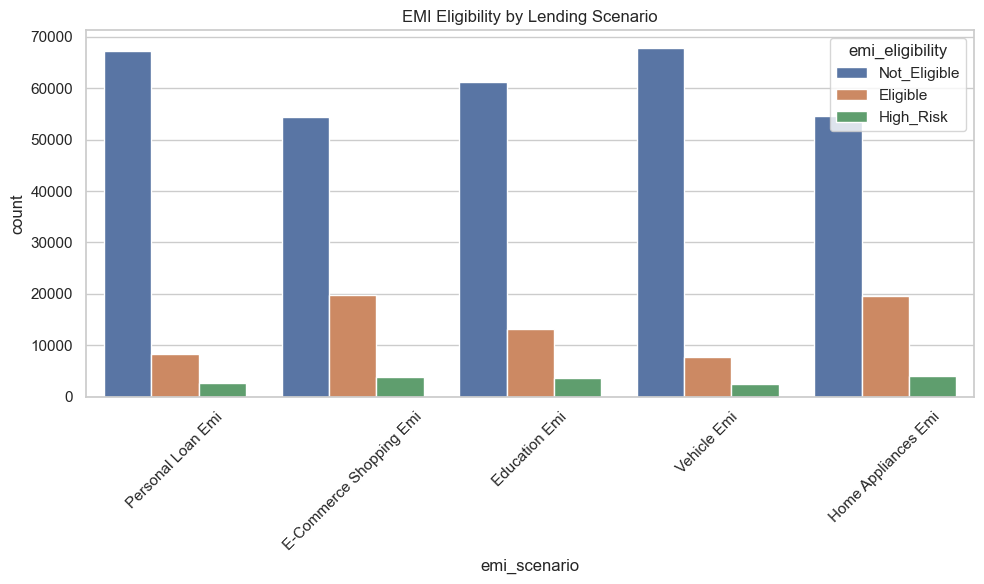

In [24]:
plt.figure()
sns.countplot(x='emi_scenario',hue = 'emi_eligibility', data=df)
plt.title('EMI Eligibility by Lending Scenario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

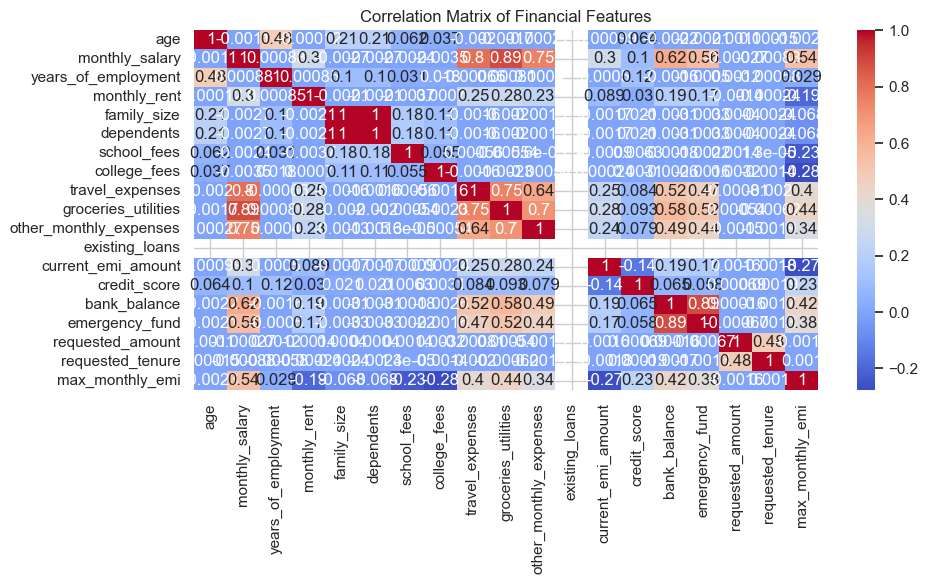

In [25]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Features')
plt.tight_layout()
plt.show()

In [26]:
print(df.groupby('emi_eligibility')[['monthly_salary', 'bank_balance', 'credit_score']].mean())



                 monthly_salary   bank_balance  credit_score
emi_eligibility                                             
Eligible           71268.777850  317630.503940    724.903574
High_Risk          64738.113976  281917.668925    715.756220
Not_Eligible       50173.853819  211334.683242    693.997576


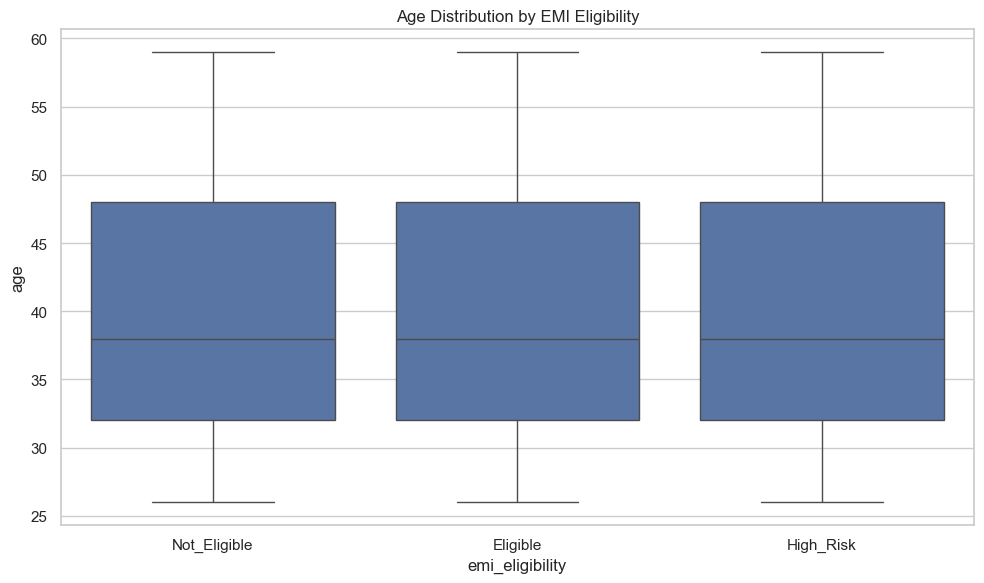

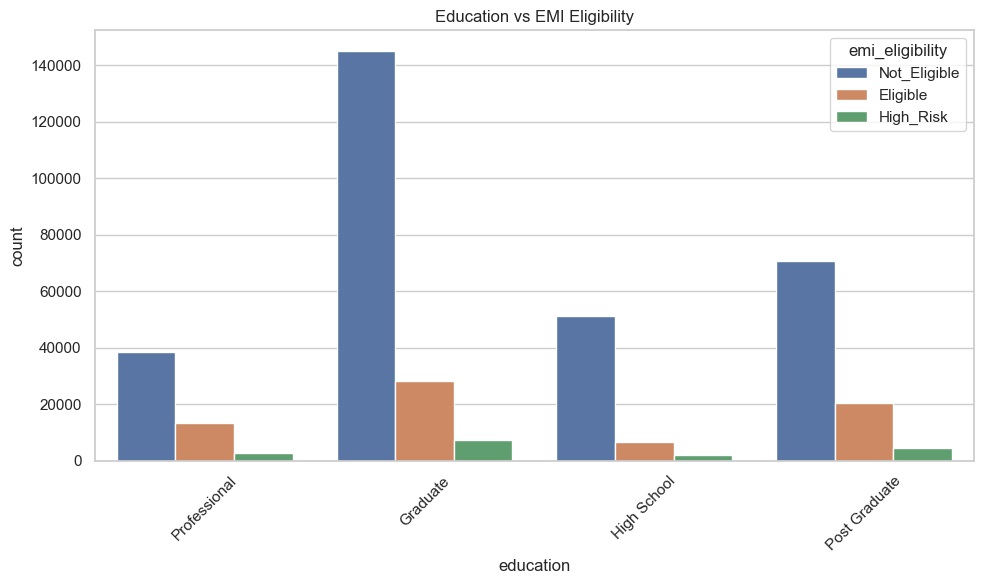

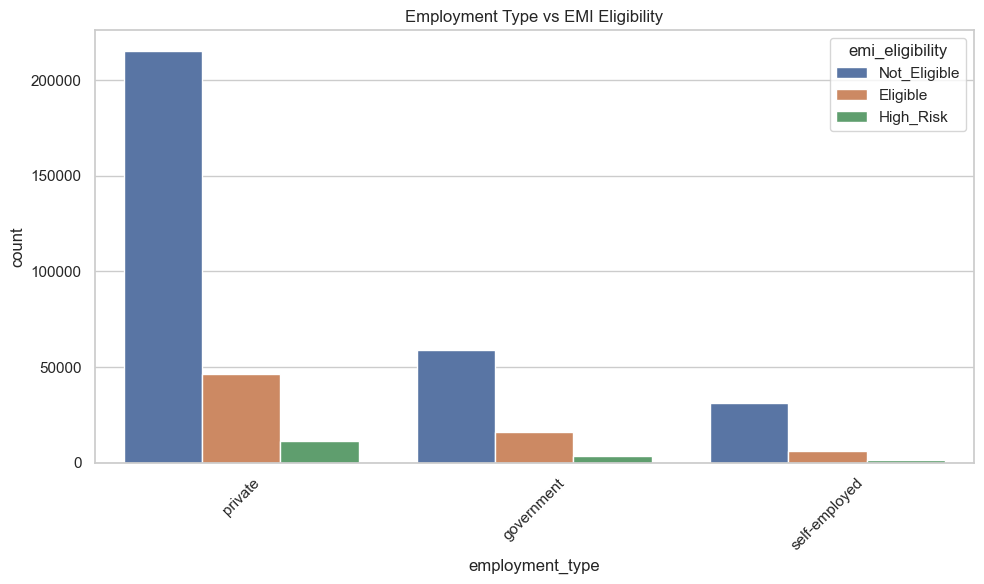

In [27]:

plt.figure()
sns.boxplot(x='emi_eligibility', y='age', data=df)
plt.title('Age Distribution by EMI Eligibility')
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='education', hue='emi_eligibility', data=df)
plt.title('Education vs EMI Eligibility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='employment_type', hue='emi_eligibility', data=df)
plt.title('Employment Type vs EMI Eligibility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
print(df.groupby('emi_eligibility').describe(include='all'))


                      age                                                   \
                    count unique top freq       mean       std   min   25%   
emi_eligibility                                                              
Eligible          68777.0    NaN NaN  NaN  38.822877  9.331706  26.0  32.0   
High_Risk         16679.0    NaN NaN  NaN  38.907369  9.386524  26.0  32.0   
Not_Eligible     305278.0    NaN NaN  NaN  38.885992  9.292312  26.0  32.0   

                             ... max_monthly_emi                         \
                  50%   75%  ...          unique top freq          mean   
emi_eligibility              ...                                          
Eligible         38.0  48.0  ...             NaN NaN  NaN  14951.412542   
High_Risk        38.0  48.0  ...             NaN NaN  NaN  11517.159818   
Not_Eligible     38.0  48.0  ...             NaN NaN  NaN   4227.974357   

                                                                        
       

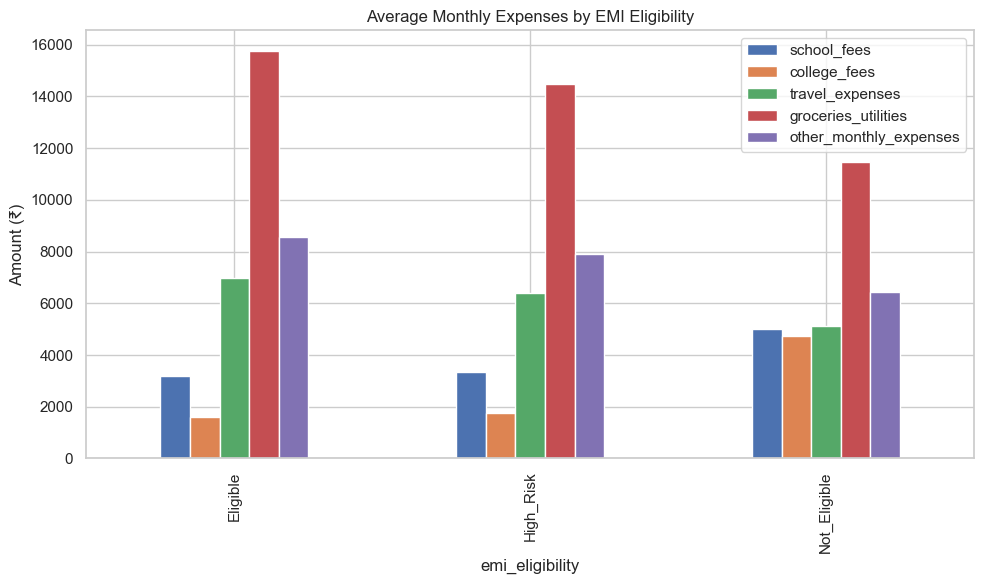

In [29]:
expense_cols = ['school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses']
df[expense_cols].groupby(df['emi_eligibility']).mean().plot(kind='bar')
plt.title('Average Monthly Expenses by EMI Eligibility')
plt.ylabel('Amount (‚Çπ)')
plt.tight_layout()
plt.show()



EMI Eligibility Counts:
emi_eligibility
Not_Eligible    305280
Eligible         68778
High_Risk        16679
Name: count, dtype: int64

Average Financial Features by EMI Eligibility:
                 monthly_salary   bank_balance  credit_score
emi_eligibility                                             
Eligible           71268.777850  317630.503940    724.903574
High_Risk          64738.113976  281917.668925    715.756220
Not_Eligible       50173.853819  211334.683242    693.997576

Education vs EMI Eligibility (Proportions):
education      emi_eligibility
Graduate       Not_Eligible       0.803037
               Eligible           0.156580
               High_Risk          0.040383
High School    Not_Eligible       0.856849
               Eligible           0.110632
               High_Risk          0.032518
Post Graduate  Not_Eligible       0.737986
               Eligible           0.213665
               High_Risk          0.048349
Professional   Not_Eligible       0.702445
      

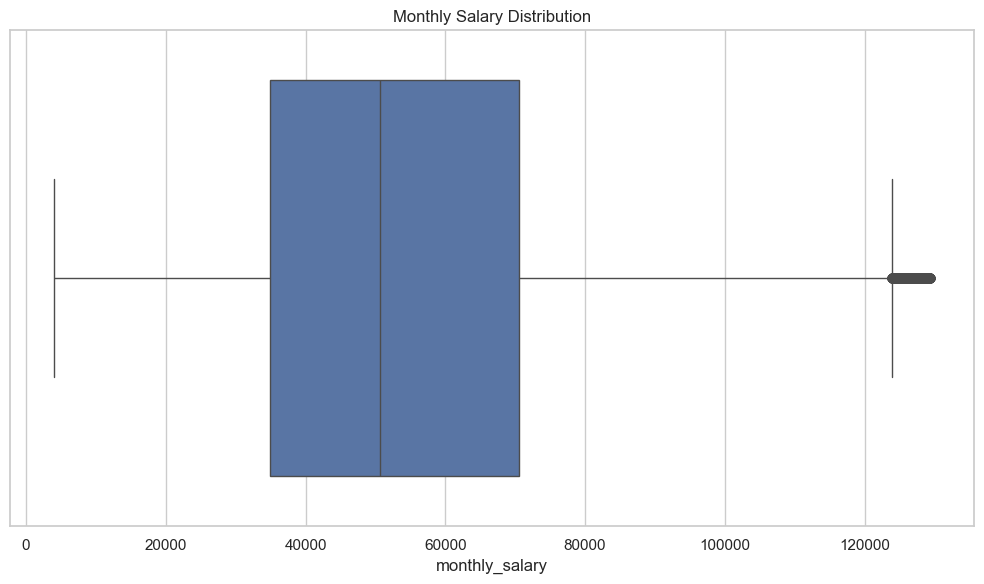

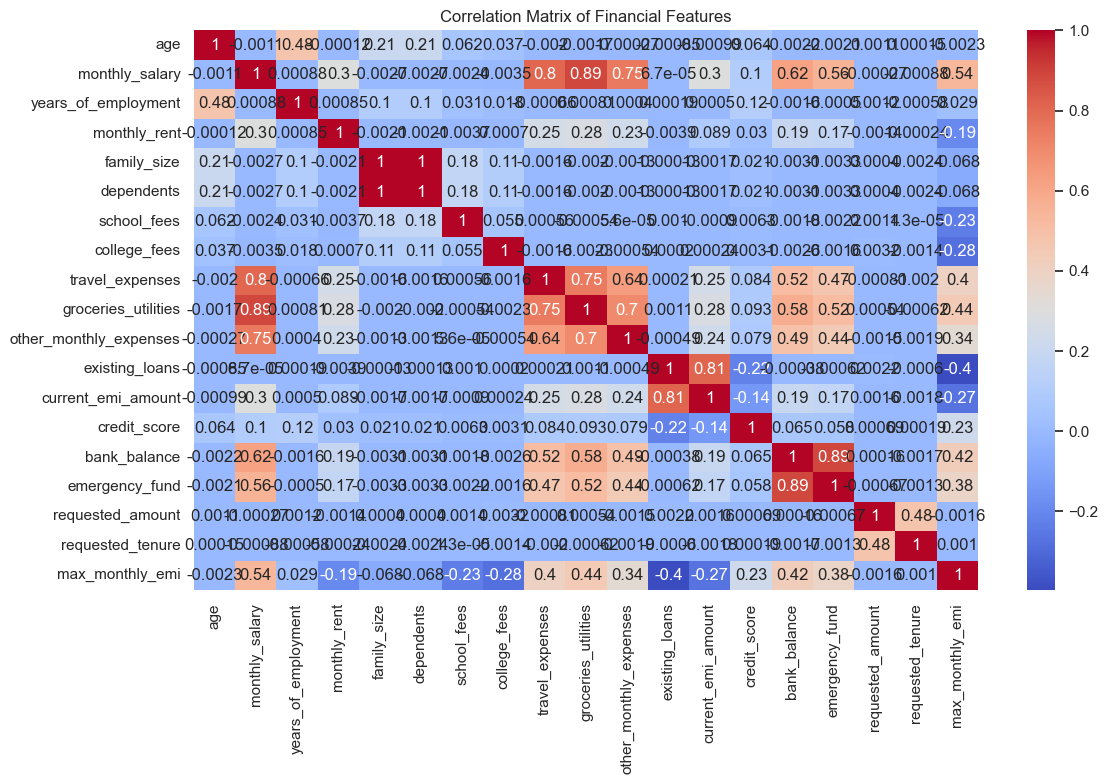

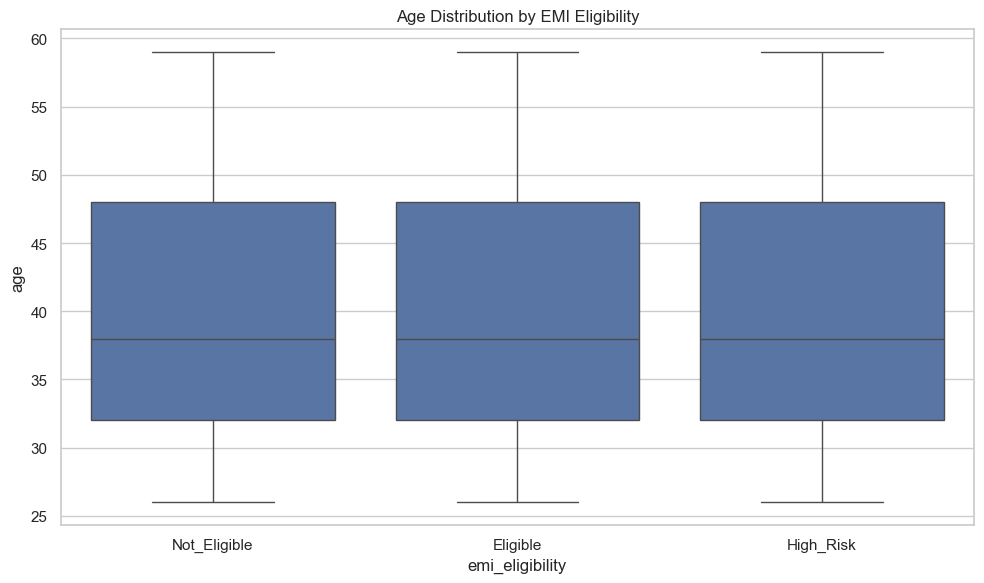

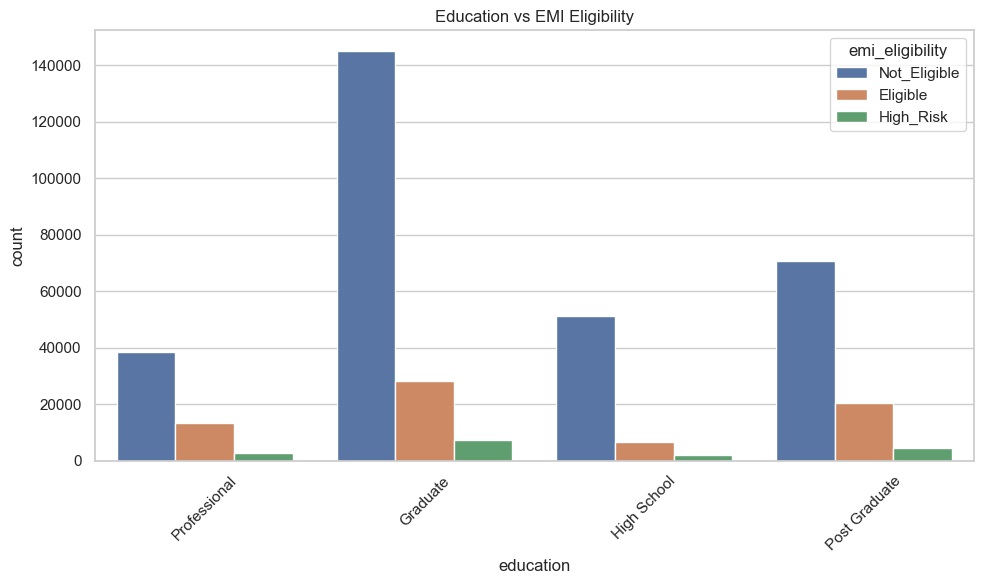

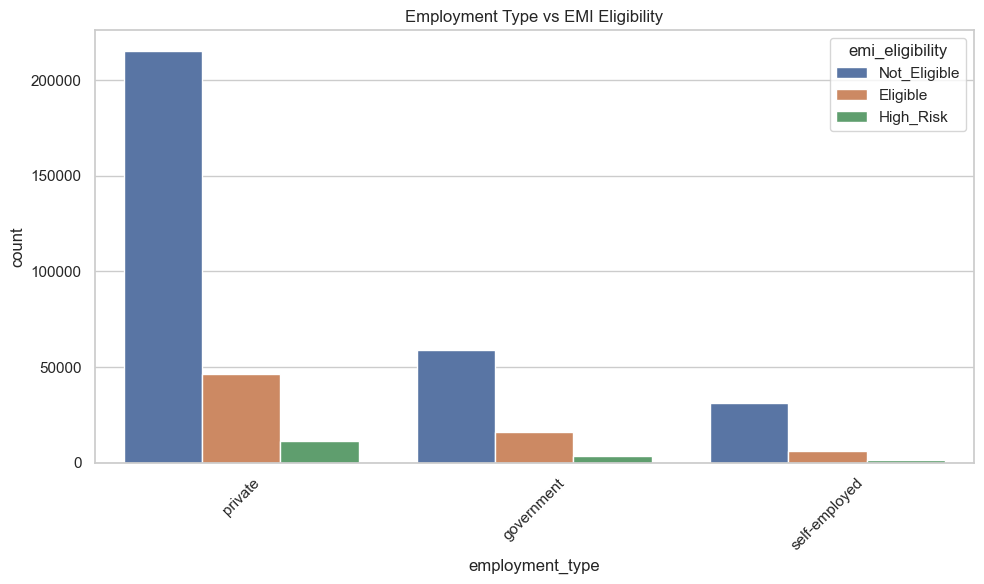

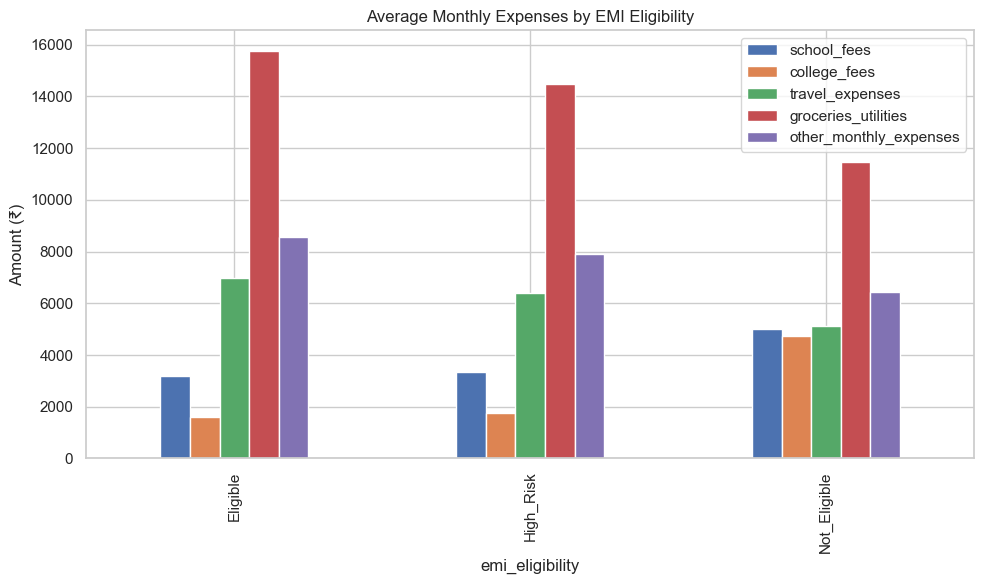

In [65]:
# üìö Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# üßº Load cleaned dataset
df = pd.read_csv('cleaned_emi_data.csv')  # Replace with your actual file path

# üé® Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1Ô∏è‚É£ EMI Eligibility Distribution
print("EMI Eligibility Counts:")
print(df['emi_eligibility'].value_counts())

# 2Ô∏è‚É£ Financial Patterns
print("\nAverage Financial Features by EMI Eligibility:")
print(df.groupby('emi_eligibility')[['monthly_salary', 'bank_balance', 'credit_score']].mean())

# 3Ô∏è‚É£ Education vs EMI Eligibility
print("\nEducation vs EMI Eligibility (Proportions):")
print(df.groupby('education')['emi_eligibility'].value_counts(normalize=True))

# 4Ô∏è‚É£ Employment Type vs EMI Eligibility
print("\nEmployment Type vs EMI Eligibility (Proportions):")
print(df.groupby('employment_type')['emi_eligibility'].value_counts(normalize=True))

# 5Ô∏è‚É£ Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 6Ô∏è‚É£ Data Types
print("\nData Types:")
print(df.dtypes)

# 7Ô∏è‚É£ Outliers (Boxplot for Salary)
plt.figure()
sns.boxplot(x='monthly_salary', data=df)
plt.title('Monthly Salary Distribution')
plt.tight_layout()
plt.show()

# 8Ô∏è‚É£ Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Features')
plt.tight_layout()
plt.show()

# 9Ô∏è‚É£ Demographic Patterns
plt.figure()
sns.boxplot(x='emi_eligibility', y='age', data=df)
plt.title('Age Distribution by EMI Eligibility')
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='education', hue='emi_eligibility', data=df)
plt.title('Education vs EMI Eligibility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(x='employment_type', hue='emi_eligibility', data=df)
plt.title('Employment Type vs EMI Eligibility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üîü Expense Breakdown
expense_cols = ['school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses']
df[expense_cols].groupby(df['emi_eligibility']).mean().plot(kind='bar')
plt.title('Average Monthly Expenses by EMI Eligibility')
plt.ylabel('Amount (‚Çπ)')
plt.tight_layout()
plt.show()

In [1]:
df = pd.read_csv('cleaned_emi_data.csv')
df['age'].fillna(df['age'].median(), inplace=True)

NameError: name 'pd' is not defined

In [19]:

# 5Ô∏è‚É£ Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64


STEP 3:
    Feature Training

In [20]:
import pandas as pd
df = pd.read_csv('cleaned_emi_data.csv')

In [23]:

# 5Ô∏è‚É£ Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64


In [24]:
# Total monthly expenses
df['total_expenses'] = df[['school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses']].sum(axis=1)

# Debt-to-Income Ratio
df['debt_to_income_ratio'] = df['current_emi_amount'] / df['monthly_salary']

# Expense-to-Income Ratio
df['expense_to_income_ratio'] = df['total_expenses'] / df['monthly_salary']

# EMI Affordability Gap
df['emi_gap'] = df['max_monthly_emi'] - df['current_emi_amount']

In [25]:
# Credit Risk Score (lower credit score = higher risk)
df['credit_risk_score'] = 850 - df['credit_score']  # assuming 850 is max

# Employment Stability Score
df['employment_stability'] = df['years_of_employment'] * df['existing_loans']  # more years + loans = stable

In [26]:
df_encoded = pd.get_dummies(df, columns=['education', 'employment_type', 'emi_scenario', 'company_type', 'house_type', 'marital_status', 'gender'], drop_first=True)

In [27]:
df.head()

age  gender marital_status     education  monthly_salary employment_type  \
0  38.0  Female        Married  Professional         82600.0         private   
1  38.0  Female        Married      Graduate         21500.0         private   
2  38.0    Male        Married  Professional         86100.0         private   
3  58.0  Female        Married   High School         66800.0         private   
4  48.0  Female        Married  Professional         57300.0         private   

   years_of_employment company_type house_type  monthly_rent  ...  \
0                  0.9     Mid-size     Rented       20000.0  ...   
1                  7.0          MNC     Family           0.0  ...   
2                  5.8      Startup        Own           0.0  ...   
3                  2.2     Mid-size        Own           0.0  ...   
4                  3.4     Mid-size     Family           0.0  ...   

   requested_amount  requested_tenure  emi_eligibility  max_monthly_emi  \
0          850000.0                15     Not_Eligible            500.0   
1          128000.0                19     Not_Eligible            700.0   
2          306000.0                16         Eligible          27775.0   
3          304000.0                83         Eligible          16170.0   
4          252000.0                 7     Not_Eligible            500.0   

   total_expenses  debt_to_income_ratio  expense_to_income_ratio  emi_gap  \
0         39900.0              0.286925                 0.483051 -23200.0   
1         15400.0              0.190698                 0.716279  -3400.0   
2         35600.0              0.000000                 0.413473  27775.0   
3         37400.0              0.000000                 0.559880  16170.0   
4         58600.0              0.000000                 1.022688    500.0   

   credit_risk_score  employment_stability  
0              190.0                   0.9  
1              136.0                   7.0  
2              200.0                   0.0  
3              165.0                   0.0  
4               80.0                   0.0  

[5 rows x 33 columns]

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['monthly_salary', 'bank_balance', 'credit_score', 'total_expenses', 'debt_to_income_ratio', 'expense_to_income_ratio', 'emi_gap', 'credit_risk_score', 'employment_stability']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [29]:
# Salary √ó Credit Score
df_encoded['salary_credit_interaction'] = df_encoded['monthly_salary'] * df_encoded['credit_score']

# Bank Balance √ó EMI Gap
df_encoded['balance_emi_gap'] = df_encoded['bank_balance'] * df_encoded['emi_gap']

In [30]:
df_encoded.head(10)

age  monthly_salary  years_of_employment  monthly_rent  family_size  \
0  38.0        1.094063                  0.9       20000.0            3   
1  38.0       -1.285579                  7.0           0.0            2   
2  38.0        1.230376                  5.8           0.0            4   
3  58.0        0.478705                  2.2           0.0            5   
4  48.0        0.108712                  3.4           0.0            4   
5  38.0       -0.611801                  5.0       13500.0            4   
6  58.0       -1.067477                 36.0           0.0            3   
7  58.0       -0.265176                 36.0           0.0            3   
8  32.0        2.908977                  1.9           0.0            2   
9  32.0        0.159343                  7.5           0.0            2   

   dependents  school_fees  college_fees  travel_expenses  \
0           2          0.0           0.0           7200.0   
1           1       5100.0           0.0           1400.0   
2           3          0.0           0.0          10200.0   
3           4      11400.0           0.0           6200.0   
4           3       9400.0       21300.0           3600.0   
5           3          0.0       24100.0           3400.0   
6           2      10200.0           0.0           1600.0   
7           2      15000.0           0.0           6100.0   
8           1       8100.0       11300.0          11800.0   
9           1          0.0        8900.0           3100.0   

   groceries_utilities  ...  marital_status_Single  gender_FEMALE  \
0              19500.0  ...                  False          False   
1               5400.0  ...                  False          False   
2              19400.0  ...                  False          False   
3              11900.0  ...                  False          False   
4              16200.0  ...                  False          False   
5               8200.0  ...                  False          False   
6               7300.0  ...                   True          False   
7               7300.0  ...                  False          False   
8              24100.0  ...                   True          False   
9              11000.0  ...                   True          False   

   gender_Female  gender_M  gender_MALE  gender_Male  gender_female  \
0           True     False        False        False          False   
1           True     False        False        False          False   
2          False     False        False         True          False   
3           True     False        False        False          False   
4           True     False        False        False          False   
5          False     False        False         True          False   
6          False     False        False         True          False   
7           True     False        False        False          False   
8          False     False        False        False           True   
9           True     False        False        False          False   

   gender_male salary_credit_interaction  balance_emi_gap  
0        False                 -0.500763        -0.954547  
1        False                 -0.198736         0.412130  
2        False                 -0.702666         6.093137  
3        False                 -0.083409         1.583869  
4        False                  0.085835         0.112560  
5        False                 -0.635674        -0.023002  
6        False                 -0.491827         0.007798  
7        False                 -0.034980         0.004746  
8        False                 -0.638793       -10.150708  
9        False                  0.163753        -0.009747  

[10 rows x 51 columns]

STEP 4:
        Model Training

In [31]:
from sklearn.model_selection import train_test_split
X =  df_encoded.drop(columns=['emi_eligibility'])
y = df_encoded['emi_eligibility']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000,class_weight='balanced')
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)

c:\Projects\emi_predict_ai\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test,y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

    Eligible       0.82      0.83      0.83     13866
   High_Risk       0.17      0.65      0.27      3247
Not_Eligible       0.99      0.84      0.91     61035

    accuracy                           0.83     78148
   macro avg       0.66      0.77      0.67     78148
weighted avg       0.93      0.83      0.87     78148

ROC-AUC: 0.9428759618893402


In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, roc_auc_score

# Print metrics
print(classification_report(y_test, y_pred_rf))

# ROC-AUC (optional)
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

    Eligible       0.93      0.93      0.93     13866
   High_Risk       0.92      0.04      0.07      3247
Not_Eligible       0.95      1.00      0.97     61035

    accuracy                           0.95     78148
   macro avg       0.93      0.66      0.66     78148
weighted avg       0.95      0.95      0.93     78148

ROC-AUC: 0.9814880641682241
ROC-AUC: 0.9814880641682241


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
label_encoder = LabelEncoder()

# Fit and transform y values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [35]:
print(label_encoder.classes_)

['Eligible' 'High_Risk' 'Not_Eligible']


In [92]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_model.predict(X_test)

c:\Projects\emi_predict_ai\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:23:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [93]:
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

In [94]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.9889952398014025


In [95]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test), multi_class='ovr')
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9988760826360803


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_encoded)

In [109]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_bal, y_train_bal)

y_pred_xgb = xgb_model.predict(X_test)

c:\Projects\emi_predict_ai\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:38:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     13866
           1       0.74      0.90      0.81      3247
           2       1.00      0.99      0.99     61035

    accuracy                           0.98     78148
   macro avg       0.91      0.95      0.93     78148
weighted avg       0.98      0.98      0.98     78148



In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded)
y_pred_dt = dt_model.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test_encoded, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test_encoded, dt_model.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     13866
           1       0.70      0.72      0.71      3247
           2       0.99      0.99      0.99     61035

    accuracy                           0.98     78148
   macro avg       0.89      0.89      0.89     78148
weighted avg       0.98      0.98      0.98     78148

ROC-AUC: 0.9383242099254357


Model selection : XGBoost for Classification
- Accuracy: 98.9%
- Macro Avg F1-score: 0.93
- ROC-AUC: 0.999
